In [215]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn import preprocessing

In [107]:
# Load the dataset
data = pd.read_csv(r"D:/Project-1 DSA/LiverT_dataset.csv")

In [108]:
data

,Column1,D_Age,D_Gender,D_BMI,D_Cause of Death,D_Diabetes,D_Hypertension,D_Alcohol_Abuse,D_Smoking,D_Lympochyte,...,R Na,R_Mg,R_WBC,R_Platelets,R_Cold_Ischemia_Time,R_Warm_Ischemia_Time,R_Blood_Transfusion,R_Immunosuppressant_Medication,R_Rejection_Episodes,Complications
0,0,40,Female,32.2,Stroke,1,1,1,0,0,...,5.9,1.5,21310,426232,3.9,2.1,0.0,Cyclosporine,3,Infection
1,1,45,Female,32.1,Other,0,0,0,0,1,...,1.8,0.3,19471,414357,3.4,3.0,0.0,Cyclosporine,1,Artery Thrombosis
2,2,21,Male,26.3,Accident,1,1,0,1,1,...,17.1,1.4,9204,292844,7.2,2.8,NaN,Tacrolimus,4,Post-transplant Diabetes
3,3,41,Female,39.3,Other,1,1,1,0,1,...,18.7,1.3,24350,190143,11.0,2.5,0.0,Other,0,Post-transplant Diabetes
4,4,66,Female,38.4,Accident,1,1,1,0,0,...,7.8,1.2,14871,403780,2.7,1.5,1.0,Other,3,Renal Dysfunction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1937,1934,18,Male,35.3,Other,1,0,1,0,1,...,15.4,0.9,21195,259229,2.5,1.9,0.0,Other,5,Primary Graft Non-function
1938,1934,18,Male,35.3,Other,1,0,1,0,1,...,15.4,0.9,21195,259229,2.5,1.9,0.0,Other,5,Primary Graft Non-function
1939,1935,30,Male,32.8,Stroke,1,1,0,0,1,...,11.0,0.7,22590,255478,8.8,1.6,0.0,Tacrolimus,2,Infection
1940,1936,52,Female,21.0,Other,1,0,1,1,1,...,2.4,0.3,10029,349280,5.4,4.8,0.0,Tacrolimus,5,Portal Vein Thrombosis


In [109]:
# Explore the data
print(data.head())  # Display the first few rows of the dataset

   Column1  D_Age D_Gender  D_BMI D_Cause of Death  D_Diabetes  \
0        0     40   Female   32.2           Stroke           1   
1        1     45   Female   32.1            Other           0   
2        2     21     Male   26.3         Accident           1   
3        3     41   Female   39.3            Other           1   
4        4     66   Female   38.4         Accident           1   

   D_Hypertension  D_Alcohol_Abuse  D_Smoking  D_Lympochyte  ...  R Na  R_Mg  \
0               1                1          0             0  ...   5.9   1.5   
1               0                0          0             1  ...   1.8   0.3   
2               1                0          1             1  ...  17.1   1.4   
3               1                1          0             1  ...  18.7   1.3   
4               1                1          0             0  ...   7.8   1.2   

   R_WBC  R_Platelets  R_Cold_Ischemia_Time R_Warm_Ischemia_Time  \
0  21310       426232                   3.9           

In [110]:
print(data.shape)   # Print the number of rows and columns in the dataset

(1942, 37)


In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1942 entries, 0 to 1941
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Column1                         1942 non-null   int64  
 1   D_Age                           1942 non-null   int64  
 2   D_Gender                        1942 non-null   object 
 3   D_BMI                           1942 non-null   float64
 4   D_Cause of Death                1942 non-null   object 
 5   D_Diabetes                      1942 non-null   int64  
 6   D_Hypertension                  1942 non-null   int64  
 7   D_Alcohol_Abuse                 1942 non-null   int64  
 8   D_Smoking                       1942 non-null   int64  
 9   D_Lympochyte                    1942 non-null   int64  
 10  D_HepatitisB                    1941 non-null   float64
 11  D_HepatitisC                    1942 non-null   int64  
 12  R_Etiology                      19

In [112]:
#Handling duplicates:
duplicate = data.duplicated()  # Returns Boolean Series denoting duplicate rows.
print(duplicate)
sum(duplicate)

0       False
1       False
2       False
3       False
4       False
        ...  
1937    False
1938     True
1939    False
1940    False
1941    False
Length: 1942, dtype: bool


4

In [113]:
# Removing Duplicates

data = data.drop_duplicates() # Returns DataFrame with duplicate rows removed.
data

,Column1,D_Age,D_Gender,D_BMI,D_Cause of Death,D_Diabetes,D_Hypertension,D_Alcohol_Abuse,D_Smoking,D_Lympochyte,...,R Na,R_Mg,R_WBC,R_Platelets,R_Cold_Ischemia_Time,R_Warm_Ischemia_Time,R_Blood_Transfusion,R_Immunosuppressant_Medication,R_Rejection_Episodes,Complications
0,0,40,Female,32.2,Stroke,1,1,1,0,0,...,5.9,1.5,21310,426232,3.9,2.1,0.0,Cyclosporine,3,Infection
1,1,45,Female,32.1,Other,0,0,0,0,1,...,1.8,0.3,19471,414357,3.4,3.0,0.0,Cyclosporine,1,Artery Thrombosis
2,2,21,Male,26.3,Accident,1,1,0,1,1,...,17.1,1.4,9204,292844,7.2,2.8,NaN,Tacrolimus,4,Post-transplant Diabetes
3,3,41,Female,39.3,Other,1,1,1,0,1,...,18.7,1.3,24350,190143,11.0,2.5,0.0,Other,0,Post-transplant Diabetes
4,4,66,Female,38.4,Accident,1,1,1,0,0,...,7.8,1.2,14871,403780,2.7,1.5,1.0,Other,3,Renal Dysfunction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,1933,49,Female,28.0,Accident,0,1,0,0,1,...,7.8,0.0,14412,235741,8.6,1.0,0.0,Cyclosporine,0,Biliary Complications
1937,1934,18,Male,35.3,Other,1,0,1,0,1,...,15.4,0.9,21195,259229,2.5,1.9,0.0,Other,5,Primary Graft Non-function
1939,1935,30,Male,32.8,Stroke,1,1,0,0,1,...,11.0,0.7,22590,255478,8.8,1.6,0.0,Tacrolimus,2,Infection
1940,1936,52,Female,21.0,Other,1,0,1,1,1,...,2.4,0.3,10029,349280,5.4,4.8,0.0,Tacrolimus,5,Portal Vein Thrombosis


In [114]:
#Checking Null Values

data.isna().sum()

Column1                           0
D_Age                             0
D_Gender                          0
D_BMI                             0
D_Cause of Death                  0
D_Diabetes                        0
D_Hypertension                    0
D_Alcohol_Abuse                   0
D_Smoking                         0
D_Lympochyte                      0
D_HepatitisB                      1
D_HepatitisC                      0
R_Etiology                        1
R_MELD_Score                      0
R_Age                             0
R_Gender                          1
R_BMI                             1
R_Diabetes                        0
R_Hypertension                    0
R_Alcohol_Abuse                   0
R_Smoking                         0
R_Lympochyte                      1
R_HepatitisB                      0
R_HepatitisC                      0
R_Albumin_level                   0
R_Alcoholic_cirrhosis             0
R_Primary_biliary_cirrhosis       0
R Na                        

In [115]:
# Replace NaN values with a specific value
data = data.fillna(0)

In [116]:
#Checking Null Values
data.isna().sum()

Column1                           0
D_Age                             0
D_Gender                          0
D_BMI                             0
D_Cause of Death                  0
D_Diabetes                        0
D_Hypertension                    0
D_Alcohol_Abuse                   0
D_Smoking                         0
D_Lympochyte                      0
D_HepatitisB                      0
D_HepatitisC                      0
R_Etiology                        0
R_MELD_Score                      0
R_Age                             0
R_Gender                          0
R_BMI                             0
R_Diabetes                        0
R_Hypertension                    0
R_Alcohol_Abuse                   0
R_Smoking                         0
R_Lympochyte                      0
R_HepatitisB                      0
R_HepatitisC                      0
R_Albumin_level                   0
R_Alcoholic_cirrhosis             0
R_Primary_biliary_cirrhosis       0
R Na                        

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 0 to 1941
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Column1                         1938 non-null   int64  
 1   D_Age                           1938 non-null   int64  
 2   D_Gender                        1938 non-null   object 
 3   D_BMI                           1938 non-null   float64
 4   D_Cause of Death                1938 non-null   object 
 5   D_Diabetes                      1938 non-null   int64  
 6   D_Hypertension                  1938 non-null   int64  
 7   D_Alcohol_Abuse                 1938 non-null   int64  
 8   D_Smoking                       1938 non-null   int64  
 9   D_Lympochyte                    1938 non-null   int64  
 10  D_HepatitisB                    1938 non-null   float64
 11  D_HepatitisC                    1938 non-null   int64  
 12  R_Etiology                      19

#### Encoding Categorical Variables (Label Encoding)

In [118]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'Gender' is the column containing categorical values
label_encoder = LabelEncoder()
data['D_Gender'] = label_encoder.fit_transform(data['D_Gender'])

In [119]:
# Assuming 'D_Cause of Death' is the column containing categorical values
data['D_Cause of Death'] = label_encoder.fit_transform(data['D_Cause of Death'])

In [120]:
# Assuming 'R_Etiology' is the column containing mixed integer and string values
data['R_Etiology'] = data['R_Etiology'].astype(str)

label_encoder = LabelEncoder()
data['R_Etiology'] = label_encoder.fit_transform(data['R_Etiology'])

In [121]:
# Assuming 'R_Gender' is the column containing mixed integer and string values
data['R_Gender'] = data['R_Gender'].astype(str)

label_encoder = LabelEncoder()
data['R_Gender'] = label_encoder.fit_transform(data['R_Gender'])

In [122]:
# Assuming 'R_Immunosuppressant_Medication' is the column containing mixed integer and string values
data['R_Immunosuppressant_Medication'] = data['R_Immunosuppressant_Medication'].astype(str)

label_encoder = LabelEncoder()
data['R_Immunosuppressant_Medication'] = label_encoder.fit_transform(data['R_Immunosuppressant_Medication'])

In [123]:
# Assuming 'Complications' is the column containing categorical values
data['Complications'] = label_encoder.fit_transform(data['Complications'])

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 0 to 1941
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Column1                         1938 non-null   int64  
 1   D_Age                           1938 non-null   int64  
 2   D_Gender                        1938 non-null   int32  
 3   D_BMI                           1938 non-null   float64
 4   D_Cause of Death                1938 non-null   int32  
 5   D_Diabetes                      1938 non-null   int64  
 6   D_Hypertension                  1938 non-null   int64  
 7   D_Alcohol_Abuse                 1938 non-null   int64  
 8   D_Smoking                       1938 non-null   int64  
 9   D_Lympochyte                    1938 non-null   int64  
 10  D_HepatitisB                    1938 non-null   float64
 11  D_HepatitisC                    1938 non-null   int64  
 12  R_Etiology                      19

In [126]:
# Separate features and target variable
X = data.drop('Complications', axis=1)
y = data['Complications']

<AxesSubplot: ylabel='Complications'>

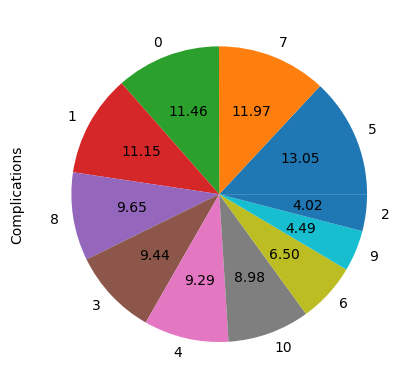

In [127]:
# Class distribution
y.value_counts()
y.value_counts().plot.pie(autopct = '%.2f')

In [128]:
#SMOTE (Synthetic Minority Over-sampling Technique) is a popular algorithm used for oversampling imbalanced datasets in machine learning.
from imblearn.over_sampling import SMOTE

In [129]:
# Apply SMOTE to handle imbalanced data
# Assuming X and y are your feature and target variables
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

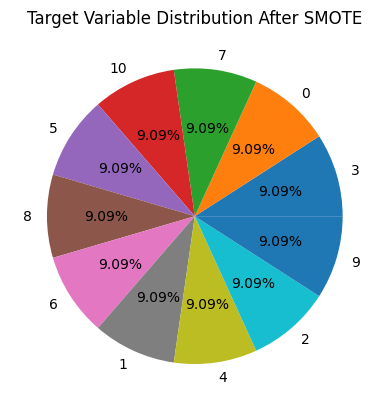

In [130]:
# Count the number of samples in each class after SMOTE
class_counts_after_smote = pd.Series(y_resampled.value_counts(), name='Counts After SMOTE')

# Plot the target variable distribution after SMOTE
plt.title('Target Variable Distribution After SMOTE')
class_counts_after_smote.plot.pie(autopct='%.2f%%')
plt.ylabel('')
plt.show()

In [131]:
from sklearn.model_selection import train_test_split

# Assuming X_resampled and y_resampled are your resampled feature and target variables
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [132]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [133]:
# Define the model and parameter grid for hyperparameter tuning
model = RandomForestClassifier()
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [134]:
# Define and initialize the random forest classifier
rf = RandomForestClassifier()

In [135]:
# Instantiate the grid search model
# Perform grid search cross-validation for hyperparameter tuning
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [136]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [137]:
# Get the best hyperparameters
best_params = grid_search.best_params_

In [138]:
# Train the model using the best hyperparameters
model = RandomForestClassifier(**best_params) 
#Fit the Random Forest Classifier on the training data.
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=110, max_features=3, min_samples_leaf=3,
                       min_samples_split=8, n_estimators=1000)

In [149]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [150]:
from sklearn.metrics import accuracy_score

# Compute the accuracy score
accuracy = accuracy_score(y_test, y_pred)

In [151]:
print("Accuracy:", accuracy)

Accuracy: 0.9766606822262118


In [152]:
# Make predictions on the training data
y_train_pred = model.predict(X_train)

In [153]:
# Print the predicted labels
print(y_train_pred)

[7 7 7 ... 0 4 9]


In [154]:
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy: {:.2f}%".format(train_accuracy * 100))

Training Accuracy: 99.73%


In [155]:
y_test_pred = model.predict(X_test)

In [298]:
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

Test Accuracy: 97.67%


In [ ]:
####################################

In [157]:
from sklearn.metrics import precision_score, recall_score

In [162]:
print(data.head())

   Column1  D_Age  D_Gender  D_BMI  D_Cause of Death  D_Diabetes  \
0        0     40         0   32.2                 2           1   
1        1     45         0   32.1                 1           0   
2        2     21         1   26.3                 0           1   
3        3     41         0   39.3                 1           1   
4        4     66         0   38.4                 0           1   

   D_Hypertension  D_Alcohol_Abuse  D_Smoking  D_Lympochyte  ...  R Na  R_Mg  \
0               1                1          0             0  ...   5.9   1.5   
1               0                0          0             1  ...   1.8   0.3   
2               1                0          1             1  ...  17.1   1.4   
3               1                1          0             1  ...  18.7   1.3   
4               1                1          0             0  ...   7.8   1.2   

   R_WBC  R_Platelets  R_Cold_Ischemia_Time  R_Warm_Ischemia_Time  \
0  21310       426232                   3

In [163]:
data

,Column1,D_Age,D_Gender,D_BMI,D_Cause of Death,D_Diabetes,D_Hypertension,D_Alcohol_Abuse,D_Smoking,D_Lympochyte,...,R Na,R_Mg,R_WBC,R_Platelets,R_Cold_Ischemia_Time,R_Warm_Ischemia_Time,R_Blood_Transfusion,R_Immunosuppressant_Medication,R_Rejection_Episodes,Complications
0,0,40,0,32.2,2,1,1,1,0,0,...,5.9,1.5,21310,426232,3.9,2.1,0.0,0,3,3
1,1,45,0,32.1,1,0,0,0,0,1,...,1.8,0.3,19471,414357,3.4,3.0,0.0,0,1,0
2,2,21,1,26.3,0,1,1,0,1,1,...,17.1,1.4,9204,292844,7.2,2.8,0.0,2,4,7
3,3,41,0,39.3,1,1,1,1,0,1,...,18.7,1.3,24350,190143,11.0,2.5,0.0,1,0,7
4,4,66,0,38.4,0,1,1,1,0,0,...,7.8,1.2,14871,403780,2.7,1.5,1.0,1,3,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,1933,49,0,28.0,0,0,1,0,0,1,...,7.8,0.0,14412,235741,8.6,1.0,0.0,0,0,1
1937,1934,18,1,35.3,1,1,0,1,0,1,...,15.4,0.9,21195,259229,2.5,1.9,0.0,1,5,8
1939,1935,30,1,32.8,2,1,1,0,0,1,...,11.0,0.7,22590,255478,8.8,1.6,0.0,2,2,3
1940,1936,52,0,21.0,1,1,0,1,1,1,...,2.4,0.3,10029,349280,5.4,4.8,0.0,2,5,6


In [174]:
R_Etiology_data = data['R_Etiology']
print(R_Etiology_data)

0       4
1       1
2       2
3       3
4       1
       ..
1936    4
1937    1
1939    3
1940    1
1941    2
Name: R_Etiology, Length: 1938, dtype: int32


In [166]:
unique_values = data['Complications'].unique()
print(unique_values)

[ 3  0  7 10  5  8  6  1  4  2  9]


In [167]:
value_counts = data['Complications'].value_counts()
print(value_counts)

5     253
7     232
0     222
1     216
8     187
3     183
4     180
10    174
6     126
9      87
2      78
Name: Complications, dtype: int64


In [299]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [300]:
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

In [301]:
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.9782913291572097
Recall: 0.9771373987674928
F1 Score: 0.9768945072412919


#### Data Standardization

In [197]:
from sklearn.preprocessing import StandardScaler


In [198]:
scaler = StandardScaler()

In [199]:
scaler.fit(X)

StandardScaler()

In [200]:
standardized_data = scaler.transform(X)

In [201]:
print(standardized_data)

[[-1.73115731 -0.27756216 -0.99177787 ... -0.9846381  -1.22581848
   0.28996156]
 [-1.72936984  0.05399323 -0.99177787 ... -0.9846381  -1.22581848
  -0.88320233]
 [-1.72758238 -1.53747262  1.0082903  ... -0.9846381   1.25785764
   0.87654351]
 ...
 [ 1.72758238 -0.94067293  1.0082903  ... -0.9846381   1.25785764
  -0.29662039]
 [ 1.72936984  0.51817077 -0.99177787 ... -0.9846381   1.25785764
   1.46312546]
 [ 1.73115731  0.05399323 -0.99177787 ... -0.9846381   0.01601958
   1.46312546]]


In [202]:
X = standardized_data
y = data['Complications']

In [203]:
print(X)
print(y)

[[-1.73115731 -0.27756216 -0.99177787 ... -0.9846381  -1.22581848
   0.28996156]
 [-1.72936984  0.05399323 -0.99177787 ... -0.9846381  -1.22581848
  -0.88320233]
 [-1.72758238 -1.53747262  1.0082903  ... -0.9846381   1.25785764
   0.87654351]
 ...
 [ 1.72758238 -0.94067293  1.0082903  ... -0.9846381   1.25785764
  -0.29662039]
 [ 1.72936984  0.51817077 -0.99177787 ... -0.9846381   1.25785764
   1.46312546]
 [ 1.73115731  0.05399323 -0.99177787 ... -0.9846381   0.01601958
   1.46312546]]
0        3
1        0
2        7
3        7
4       10
        ..
1936     1
1937     8
1939     3
1940     6
1941     3
Name: Complications, Length: 1938, dtype: int32


#### Making a predictive system

In [228]:
input_data = (0,40,0,32.2,2,1,1,1,0,0,1,0,4,18,22,0,29.5,1,0,0,0,1,0,1,33,84,4.1,5.9,1.5,21310,426232,3.9,2.1,0,0,3)

In [229]:
#changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

In [230]:
#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [231]:
# standardize the input data
std_data =  scaler.transform(input_data_reshaped)

In [232]:
print(std_data)

[[-5.86619390e-17  4.00000000e+01  1.09991136e-17  3.22000000e+01
   2.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  -1.46654847e-17  1.48488033e-16  1.00000000e+00  1.50321219e-16
   4.00000000e+00  1.80000000e+01  2.20000000e+01 -2.16315900e-16
   2.95000000e+01  1.00000000e+00 -1.37488919e-17 -3.48305263e-17
   2.29148199e-18  1.00000000e+00 -2.56645983e-17  1.00000000e+00
   3.30000000e+01  8.40000000e+01  4.10000000e+00  5.90000000e+00
   1.50000000e+00  2.13100000e+04  4.26232000e+05  3.90000000e+00
   2.10000000e+00 -2.74977839e-17 -4.58296398e-18  3.00000000e+00]]


In [233]:
prediction = model.predict(std_data)

C:\Users\91866\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [234]:
print(prediction)

if prediction[0] == 0:
    print('No Complications occur')
else:
    print('Complications occur')

[3]
Complications occur


In [235]:
input_data = (3,41,0,39.3,1,1,1,1,0,1,1,1,3,13,68,0,22.7,1,0,1,1,1,0,0,45,16,1,18.7,1.3,24350,190143,11,2.5,0,1,0)

In [236]:
input_data_as_numpy_array = np.asarray(input_data)

In [237]:
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [238]:
std_data =  scaler.transform(input_data_reshaped)

In [239]:
print(std_data)

[[ 3.00000000e+00  4.10000000e+01  1.09991136e-17  3.93000000e+01
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  -1.46654847e-17  1.00000000e+00  1.00000000e+00  1.00000000e+00
   3.00000000e+00  1.30000000e+01  6.80000000e+01 -2.16315900e-16
   2.27000000e+01  1.00000000e+00 -1.37488919e-17  1.00000000e+00
   1.00000000e+00  1.00000000e+00 -2.56645983e-17 -8.61597229e-17
   4.50000000e+01  1.60000000e+01  1.00000000e+00  1.87000000e+01
   1.30000000e+00  2.43500000e+04  1.90143000e+05  1.10000000e+01
   2.50000000e+00 -2.74977839e-17  1.00000000e+00  1.06783061e-16]]


In [240]:
prediction = model.predict(std_data)

C:\Users\91866\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [241]:
print(prediction)

if prediction[0] == 0:
    print('No Complications occur')
else:
    print('Complications occur')

[7]
Complications occur


In [ ]:
#### imagination value

In [242]:
input_data = (3,41,0,39.3,1,0,1,0,0,1,1,1,3,13,78,0,22.7,1,0,1,1,1,0,0,45,16,0,18.7,1.3,24350,190143,11,2.5,1,1,4)

In [243]:
input_data_as_numpy_array = np.asarray(input_data)

In [244]:
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [245]:
std_data =  scaler.transform(input_data_reshaped)

In [246]:
print(std_data)

[[ 3.00000000e+00  4.10000000e+01  1.09991136e-17  3.93000000e+01
   1.00000000e+00  5.77453462e-17  1.00000000e+00 -4.76628254e-17
  -1.46654847e-17  1.00000000e+00  1.00000000e+00  1.00000000e+00
   3.00000000e+00  1.30000000e+01  7.80000000e+01 -2.16315900e-16
   2.27000000e+01  1.00000000e+00 -1.37488919e-17  1.00000000e+00
   1.00000000e+00  1.00000000e+00 -2.56645983e-17 -8.61597229e-17
   4.50000000e+01  1.60000000e+01  3.75803047e-17  1.87000000e+01
   1.30000000e+00  2.43500000e+04  1.90143000e+05  1.10000000e+01
   2.50000000e+00  1.00000000e+00  1.00000000e+00  4.00000000e+00]]


In [247]:
prediction = model.predict(std_data)

C:\Users\91866\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [248]:
print(prediction)

if prediction[0] == 0:
    print('No Complications occur')
else:
    print('Complications occur')

[2]
Complications occur


In [253]:
input_data = (2,33,0,39.3,0,0,0,0,0,0,0,0,3,13,68,0,32.7,0,0,0,0,0,0,0,45,19,0,15.7,1.3,24350,190143,19,2.5,1,1,2)

In [254]:
input_data_as_numpy_array = np.asarray(input_data)

In [255]:
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [256]:
std_data =  scaler.transform(input_data_reshaped)

In [257]:
print(std_data)

[[ 2.00000000e+00  3.30000000e+01  1.09991136e-17  3.93000000e+01
   1.28322991e-17  5.77453462e-17  1.97984044e-16 -4.76628254e-17
  -1.46654847e-17  1.48488033e-16 -2.19982271e-17  1.50321219e-16
   3.00000000e+00  1.30000000e+01  6.80000000e+01 -2.16315900e-16
   3.27000000e+01  9.53256508e-17 -1.37488919e-17 -3.48305263e-17
   2.29148199e-18 -7.33274237e-18 -2.56645983e-17 -8.61597229e-17
   4.50000000e+01  1.90000000e+01  3.75803047e-17  1.57000000e+01
   1.30000000e+00  2.43500000e+04  1.90143000e+05  1.90000000e+01
   2.50000000e+00  1.00000000e+00  1.00000000e+00  2.00000000e+00]]


In [258]:
prediction = model.predict(std_data)

C:\Users\91866\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [259]:
print(prediction)

if prediction[0] == 0:
    print('No Complications occur')
else:
    print('Complications occur')

[0]
No Complications occur


##### AUTO ML

In [266]:
!pip install Microsoft Visual C++ Build Tools

ERROR: Invalid requirement: 'C++'


In [267]:
!pip install --upgrade pip

     ---------------------------------------- 2.1/2.1 MB 364.2 kB/s eta 0:00:00


ERROR: To modify pip, please run the following command:
C:\Users\91866\anaconda3\python.exe -m pip install --upgrade pip


In [268]:
!pip cache purge

Files removed: 449


#### FLAML

In [278]:
!pip install flaml

     -------------------------------------- 260.5/260.5 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 1.0/1.0 MB 3.2 MB/s eta 0:00:00


In [279]:
from flaml import AutoML

In [281]:
from sklearn.datasets import data

In [282]:
#Initialize an AutoML instance
automl = AutoML()

In [297]:
#Specify automl goal and constraint
automl_settings = {
    "time_budget": 60,  # Time budget in seconds
    "metric": 'accuracy',  # Metric to optimize
    "task": 'classification',  # Task type
    "log_file_name": 'automl.log',  # Log file name
}

In [287]:
#balancing the data
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X,y)

In [289]:
# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train, **automl_settings)

[flaml.automl.logger: 06-09 12:06:14] {1693} INFO - task = classification
[flaml.automl.logger: 06-09 12:06:14] {1700} INFO - Data split method: stratified
[flaml.automl.logger: 06-09 12:06:14] {1703} INFO - Evaluation method: cv
[flaml.automl.logger: 06-09 12:06:14] {1801} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.logger: 06-09 12:06:14] {1911} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl.logger: 06-09 12:06:14] {2221} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 06-09 12:06:16] {2347} INFO - Estimated sufficient time budget=24542s. Estimated necessary time budget=566s.
[flaml.automl.logger: 06-09 12:06:16] {2394} INFO -  at 2.8s,	estimator lgbm's best error=0.0701,	best estimator lgbm's best error=0.0701
[flaml.automl.logger: 06-09 12:06:16] {2221} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 06-09 12:06:17] {2394} INFO -  at 3.6s,	estimator lgbm's best erro

C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 06-09 12:06:33] {2394} INFO -  at 18.8s,	estimator xgboost's best error=0.0402,	best estimator xgboost's best error=0.0402
[flaml.automl.logger: 06-09 12:06:33] {2221} INFO - iteration 12, current learner xgboost


C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 06-09 12:06:33] {2394} INFO -  at 19.1s,	estimator xgboost's best error=0.0402,	best estimator xgboost's best error=0.0402
[flaml.automl.logger: 06-09 12:06:33] {2221} INFO - iteration 13, current learner xgboost


C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 06-09 12:06:33] {2394} INFO -  at 19.5s,	estimator xgboost's best error=0.0367,	best estimator xgboost's best error=0.0367
[flaml.automl.logger: 06-09 12:06:33] {2221} INFO - iteration 14, current learner xgboost


C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.p

[flaml.automl.logger: 06-09 12:06:34] {2394} INFO -  at 20.0s,	estimator xgboost's best error=0.0259,	best estimator xgboost's best error=0.0259
[flaml.automl.logger: 06-09 12:06:34] {2221} INFO - iteration 15, current learner xgboost


C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 06-09 12:06:34] {2394} INFO -  at 20.5s,	estimator xgboost's best error=0.0205,	best estimator xgboost's best error=0.0205
[flaml.automl.logger: 06-09 12:06:34] {2221} INFO - iteration 16, current learner xgboost


C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 06-09 12:06:35] {2394} INFO -  at 20.9s,	estimator xgboost's best error=0.0205,	best estimator xgboost's best error=0.0205
[flaml.automl.logger: 06-09 12:06:35] {2221} INFO - iteration 17, current learner xgboost


C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.p

[flaml.automl.logger: 06-09 12:06:35] {2394} INFO -  at 21.6s,	estimator xgboost's best error=0.0137,	best estimator xgboost's best error=0.0137
[flaml.automl.logger: 06-09 12:06:35] {2221} INFO - iteration 18, current learner xgboost


C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 06-09 12:06:36] {2394} INFO -  at 22.4s,	estimator xgboost's best error=0.0137,	best estimator xgboost's best error=0.0137
[flaml.automl.logger: 06-09 12:06:36] {2221} INFO - iteration 19, current learner xgboost


C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.p

[flaml.automl.logger: 06-09 12:06:37] {2394} INFO -  at 23.1s,	estimator xgboost's best error=0.0137,	best estimator xgboost's best error=0.0137
[flaml.automl.logger: 06-09 12:06:37] {2221} INFO - iteration 20, current learner xgboost


C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 06-09 12:06:38] {2394} INFO -  at 24.5s,	estimator xgboost's best error=0.0137,	best estimator xgboost's best error=0.0137
[flaml.automl.logger: 06-09 12:06:38] {2221} INFO - iteration 21, current learner xgboost


C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 06-09 12:06:39] {2394} INFO -  at 25.7s,	estimator xgboost's best error=0.0137,	best estimator xgboost's best error=0.0137
[flaml.automl.logger: 06-09 12:06:39] {2221} INFO - iteration 22, current learner xgboost


C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 06-09 12:06:40] {2394} INFO -  at 26.7s,	estimator xgboost's best error=0.0137,	best estimator xgboost's best error=0.0137
[flaml.automl.logger: 06-09 12:06:40] {2221} INFO - iteration 23, current learner extra_tree


C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 06-09 12:06:43] {2394} INFO -  at 29.0s,	estimator extra_tree's best error=0.3040,	best estimator xgboost's best error=0.0137
[flaml.automl.logger: 06-09 12:06:43] {2221} INFO - iteration 24, current learner extra_tree
[flaml.automl.logger: 06-09 12:06:43] {2394} INFO -  at 29.2s,	estimator extra_tree's best error=0.2512,	best estimator xgboost's best error=0.0137
[flaml.automl.logger: 06-09 12:06:43] {2221} INFO - iteration 25, current learner xgboost


C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 06-09 12:06:45] {2394} INFO -  at 31.2s,	estimator xgboost's best error=0.0137,	best estimator xgboost's best error=0.0137
[flaml.automl.logger: 06-09 12:06:45] {2221} INFO - iteration 26, current learner extra_tree
[flaml.automl.logger: 06-09 12:06:45] {2394} INFO -  at 31.5s,	estimator extra_tree's best error=0.2512,	best estimator xgboost's best error=0.0137
[flaml.automl.logger: 06-09 12:06:45] {2221} INFO - iteration 27, current learner rf
[flaml.automl.logger: 06-09 12:06:46] {2394} INFO -  at 31.8s,	estimator rf's best error=0.2303,	best estimator xgboost's best error=0.0137
[flaml.automl.logger: 06-09 12:06:46] {2221} INFO - iteration 28, current learner xgboost


C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 06-09 12:06:46] {2394} INFO -  at 32.7s,	estimator xgboost's best error=0.0137,	best estimator xgboost's best error=0.0137
[flaml.automl.logger: 06-09 12:06:46] {2221} INFO - iteration 29, current learner xgboost


C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 06-09 12:06:49] {2394} INFO -  at 35.0s,	estimator xgboost's best error=0.0137,	best estimator xgboost's best error=0.0137
[flaml.automl.logger: 06-09 12:06:49] {2221} INFO - iteration 30, current learner rf
[flaml.automl.logger: 06-09 12:06:49] {2394} INFO -  at 35.3s,	estimator rf's best error=0.2160,	best estimator xgboost's best error=0.0137
[flaml.automl.logger: 06-09 12:06:49] {2221} INFO - iteration 31, current learner rf
[flaml.automl.logger: 06-09 12:06:49] {2394} INFO -  at 35.6s,	estimator rf's best error=0.2160,	best estimator xgboost's best error=0.0137
[flaml.automl.logger: 06-09 12:06:49] {2221} INFO - iteration 32, current learner rf
[flaml.automl.logger: 06-09 12:06:50] {2394} INFO -  at 36.2s,	estimator rf's best error=0.1574,	best estimator xgboost's best error=0.0137
[flaml.automl.logger: 06-09 12:06:50] {2221} INFO - iteration 33, current learner extra_tree
[flaml.automl.logger: 06-09 12:06:50] {2394} INFO -  at 36.6s,	estimator extra_tree's b

C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 06-09 12:06:53] {2394} INFO -  at 39.3s,	estimator xgboost's best error=0.0137,	best estimator xgboost's best error=0.0137
[flaml.automl.logger: 06-09 12:06:53] {2221} INFO - iteration 38, current learner xgboost


C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 06-09 12:06:55] {2394} INFO -  at 41.2s,	estimator xgboost's best error=0.0137,	best estimator xgboost's best error=0.0137
[flaml.automl.logger: 06-09 12:06:55] {2221} INFO - iteration 39, current learner rf
[flaml.automl.logger: 06-09 12:06:55] {2394} INFO -  at 41.8s,	estimator rf's best error=0.1312,	best estimator xgboost's best error=0.0137
[flaml.automl.logger: 06-09 12:06:55] {2221} INFO - iteration 40, current learner xgboost


C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 06-09 12:06:56] {2394} INFO -  at 42.3s,	estimator xgboost's best error=0.0137,	best estimator xgboost's best error=0.0137
[flaml.automl.logger: 06-09 12:06:56] {2221} INFO - iteration 41, current learner xgboost


C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 06-09 12:07:00] {2394} INFO -  at 45.9s,	estimator xgboost's best error=0.0137,	best estimator xgboost's best error=0.0137
[flaml.automl.logger: 06-09 12:07:00] {2221} INFO - iteration 42, current learner lgbm
[flaml.automl.logger: 06-09 12:07:06] {2394} INFO -  at 52.8s,	estimator lgbm's best error=0.0417,	best estimator xgboost's best error=0.0137
[flaml.automl.logger: 06-09 12:07:06] {2221} INFO - iteration 43, current learner xgboost


C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 06-09 12:07:07] {2394} INFO -  at 53.3s,	estimator xgboost's best error=0.0137,	best estimator xgboost's best error=0.0137
[flaml.automl.logger: 06-09 12:07:07] {2221} INFO - iteration 44, current learner extra_tree
[flaml.automl.logger: 06-09 12:07:07] {2394} INFO -  at 53.8s,	estimator extra_tree's best error=0.1394,	best estimator xgboost's best error=0.0137
[flaml.automl.logger: 06-09 12:07:07] {2221} INFO - iteration 45, current learner extra_tree
[flaml.automl.logger: 06-09 12:07:08] {2394} INFO -  at 54.1s,	estimator extra_tree's best error=0.1394,	best estimator xgboost's best error=0.0137
[flaml.automl.logger: 06-09 12:07:08] {2221} INFO - iteration 46, current learner extra_tree
[flaml.automl.logger: 06-09 12:07:09] {2394} INFO -  at 54.9s,	estimator extra_tree's best error=0.0521,	best estimator xgboost's best error=0.0137
[flaml.automl.logger: 06-09 12:07:09] {2221} INFO - iteration 47, current learner extra_tree
[flaml.automl.logger: 06-09 12:07:09] {

C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 06-09 12:07:11] {2394} INFO -  at 57.6s,	estimator xgboost's best error=0.0129,	best estimator xgboost's best error=0.0129
[flaml.automl.logger: 06-09 12:07:11] {2221} INFO - iteration 49, current learner extra_tree
[flaml.automl.logger: 06-09 12:07:13] {2394} INFO -  at 58.9s,	estimator extra_tree's best error=0.0521,	best estimator xgboost's best error=0.0129
[flaml.automl.logger: 06-09 12:07:13] {2221} INFO - iteration 50, current learner extra_tree
[flaml.automl.logger: 06-09 12:07:13] {2394} INFO -  at 59.4s,	estimator extra_tree's best error=0.0521,	best estimator xgboost's best error=0.0129
[flaml.automl.logger: 06-09 12:07:13] {2221} INFO - iteration 51, current learner xgb_limitdepth


C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 06-09 12:07:14] {2394} INFO -  at 60.1s,	estimator xgb_limitdepth's best error=0.0168,	best estimator xgboost's best error=0.0129


C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 06-09 12:07:14] {2630} INFO - retrain xgboost for 0.4s
[flaml.automl.logger: 06-09 12:07:14] {2633} INFO - retrained model: XGBClassifier(base_score=None, booster=None, callbacks=[],
              colsample_bylevel=0.8833142421826156, colsample_bynode=None,
              colsample_bytree=0.9423882066359944, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy='lossguide',
              importance_type=None, interaction_constraints=None,
              learning_rate=0.28181396744910253, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=0, max_leaves=29,
              min_child_weight=0.5688945573206103, missing=nan,
              monotone_constraints=None, n_estimators=16, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob',
              predictor=None, ...)
[flaml.auto

In [292]:
print(automl.fit)

<bound method AutoML.fit of AutoML(append_log=False, auto_augment=True, custom_hp={},
       cv_score_agg_func=None, early_stop=False, ensemble=False,
       estimator_list='auto', eval_method='auto', fit_kwargs_by_estimator={},
       force_cancel=False, free_mem_ratio=0, hpo_method='auto',
       keep_search_state=False, learner_selector='sample', log_file_name='',
       log_training_metric=False, log_type='better', max_iter=None,
       mem_thres=4294967296, metric='auto', metric_constraints=[],
       min_sample_size=10000, mlflow_logging=True, model_history=False,
       n_concurrent_trials=1, n_jobs=-1, n_splits=5, pred_time_limit=inf,
       preserve_checkpoint=True, retrain_full=True, ...)>


In [294]:
# Predict
print(automl.predict_proba(X_train))

# Export the best model
print(automl.model)

[[0.00139183 0.00195561 0.00133914 ... 0.00247037 0.00133958 0.00177726]
 [0.94896126 0.00314039 0.02118742 ... 0.0029906  0.00283583 0.00286577]
 [0.00152683 0.00152156 0.0015756  ... 0.00531062 0.00152263 0.0015387 ]
 ...
 [0.00133442 0.00145861 0.00131738 ... 0.00214126 0.00131781 0.983886  ]
 [0.00137236 0.00135295 0.00131638 ... 0.00220463 0.00131681 0.98314005]
 [0.00166282 0.00191851 0.00131373 ... 0.00207078 0.00131416 0.9833129 ]]
